In [21]:
from tqdm import tqdm
import numpy as np
np.set_printoptions(threshold=20)
#atts,sz = bns.attractors_from_txt('att_reach_simp')
#rsnodes = list(np.load('nodes_reach_simp.npy',allow_pickle=True))
ps = [0,0.2,0.4,0.6,0.8]
ts = ['so','inv']
att_sizes = []
num_unchanged = []
unchanged = []
for j in tqdm(range(10)):
    for p in ps:
        for t in ts:
            fo=open('att_newneg2_'+str(p)+'_'+t+'_'+str(j)+'.txt',encoding='utf-8') #read texts
            lines=fo.readlines()
            for i in range(len(lines)):
                line = lines[i]
                if 'Attractor number' in line:
                    #att_sizes.append(line.split(':')[-1].strip())
                    att_size = int(line.split(':')[-1].strip())
                    if att_size != 1:
                        att = []
                        for k in range(1,att_size+1):
                            state = [int(x) for x in list(lines[i-k].strip())]
                            att.append(state)
                        att = np.array(att)
                        sub = np.array([att[x,:]-att[x+1,:] for x in np.arange(-1,att_size-1,1)])
                        u=np.where(~sub.any(axis=0))[0]
                        unchanged.append(u)
                        num_unchanged.append(len(u))
                        


100%|██████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


In [28]:
np.median(num_unchanged)

75.0

In [27]:
unchanged[0]
setlist = [set(unchanged[i]) for i in range(len(unchanged))]
u = set.intersection(*setlist)
print(len(u))

15


In [32]:
unchanged_flat = np.concatenate(unchanged).ravel()
unique, counts = np.unique(unchanged_flat, return_counts=True)


array([ 83554,  97412, 105206, ...,  93856,  27800, 105224])

In [42]:
#import bns
import numpy as np
import networkx as nx
#G_rs = nx.read_gml('reach_simp.gml')
G_rs2 = nx.read_gml('rs2.gml')
nodes = sorted(list(G_rs2.nodes()))
nodes

['adiY',
 'aidB',
 'araC',
 'arcA',
 'argP',
 'asnC',
 'betI',
 'bglJ',
 'cadC',
 'cra',
 'crp',
 'csgD',
 'cspA',
 'cusR',
 'dcuR',
 'dnaA',
 'dpiA',
 'evgA',
 'exuR',
 'fhlA',
 'fis',
 'flhC',
 'flhD',
 'fliZ',
 'fnr',
 'fucR',
 'fur',
 'gadE',
 'gadW',
 'gadX',
 'galR',
 'galS',
 'glcC',
 'glnG',
 'gutM',
 'hdfR',
 'hns',
 'hyfR',
 'idnR',
 'leuO',
 'lldR',
 'lrp',
 'lsrR',
 'malI',
 'marA',
 'marR',
 'mazE',
 'mazF',
 'melR',
 'metJ',
 'metR',
 'mlc',
 'mlrA',
 'mraZ',
 'nac',
 'narL',
 'nhaR',
 'nikR',
 'ompR',
 'oxyR',
 'pdeL',
 'pdhR',
 'phoB',
 'prpR',
 'ptsG',
 'purR',
 'putA',
 'puuR',
 'rbsR',
 'rcsA',
 'rcsB',
 'rhaR',
 'rhaS',
 'rob',
 'soxR',
 'soxS',
 'srlR',
 'stpA',
 'tdcA',
 'uxuR',
 'xylR',
 'ydeO',
 'yeiL',
 'yiaJ',
 'yjjQ',
 'yqjI',
 'zraR']

In [45]:
sorted(dict(zip([nodes[u] for u in unique],counts/len(unchanged))),key=lambda elem:-elem[1])

TypeError: bad operand type for unary -: 'str'

0.8452806972929561


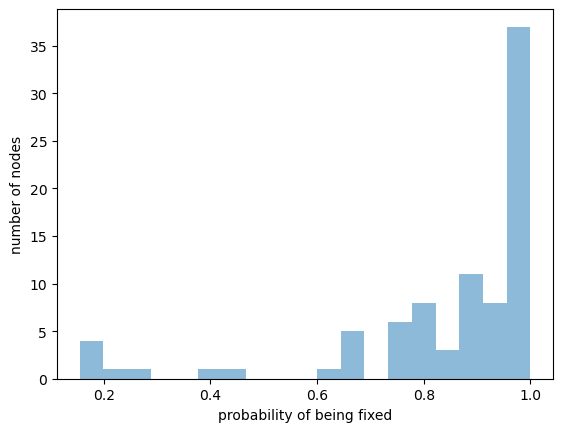

In [39]:

import numpy as np
import math
from matplotlib import pyplot as plt

data = counts/len(unchanged)
print(np.mean(data))

bins = np.linspace(min(data), 
                   max(data),
                   20) # fixed number of bins

#plt.xlim([min(data)-0.1, max(data)+0.1])

plt.hist(data, bins=bins, alpha=0.5)
#plt.title('')
plt.xlabel('probability of being fixed')
plt.ylabel('number of nodes')

plt.show()

In [15]:
for t in ts:
    fo=open('att_newneg2_'+'f'+'_'+t+'.txt',encoding='utf-8') #read texts
    lines=fo.readlines()
    for line in lines:
        if 'Attractor number' in line:
            att_sizes.append(line.split(':')[-1].strip())       

In [16]:
len(att_sizes)

162608

In [17]:
from collections import Counter
Counter(att_sizes)

Counter({'4': 86712,
         '20': 448,
         '12': 2512,
         '1': 57304,
         '2': 8160,
         '6': 1824,
         '3': 1620,
         '5': 3988,
         '7': 16,
         '10': 24})

In [1]:
import bns
import numpy as np
import networkx as nx
G_rs = nx.read_gml('reach_simp.gml')
G_rs2 = nx.read_gml('rs2.gml')
np.set_printoptions(threshold=20)
attrs,sz = bns.attractors_from_txt('atts_rs')
print(len(attrs))
attrs2,sz = bns.attractors_from_txt('atts_rs2')
print(len(attrs2))


295120
295120


In [25]:
mobile = sorted(G_rs2.nodes())
print(mobile)
for i in range(87):
    for j in range(len(attrs2)):
        att_i = set(np.array(attrs2[j])[:,i])
        
        #if att_i == {0}:
            #static0.append(sorted(G_rs2.nodes())[i])
        #if att_i == {1}:
            #static1.append(sorted(G_rs2.nodes())[i])
        if att_i != {0,1}:
            mobile.remove(sorted(G_rs2.nodes())[i])
            break
            
print(mobile)

['adiY', 'aidB', 'araC', 'arcA', 'argP', 'asnC', 'betI', 'bglJ', 'cadC', 'cra', 'crp', 'csgD', 'cspA', 'cusR', 'dcuR', 'dnaA', 'dpiA', 'evgA', 'exuR', 'fhlA', 'fis', 'flhC', 'flhD', 'fliZ', 'fnr', 'fucR', 'fur', 'gadE', 'gadW', 'gadX', 'galR', 'galS', 'glcC', 'glnG', 'gutM', 'hdfR', 'hns', 'hyfR', 'idnR', 'leuO', 'lldR', 'lrp', 'lsrR', 'malI', 'marA', 'marR', 'mazE', 'mazF', 'melR', 'metJ', 'metR', 'mlc', 'mlrA', 'mraZ', 'nac', 'narL', 'nhaR', 'nikR', 'ompR', 'oxyR', 'pdeL', 'pdhR', 'phoB', 'prpR', 'ptsG', 'purR', 'putA', 'puuR', 'rbsR', 'rcsA', 'rcsB', 'rhaR', 'rhaS', 'rob', 'soxR', 'soxS', 'srlR', 'stpA', 'tdcA', 'uxuR', 'xylR', 'ydeO', 'yeiL', 'yiaJ', 'yjjQ', 'yqjI', 'zraR']
['aidB', 'arcA', 'asnC', 'cadC', 'exuR', 'fnr', 'fur', 'galR', 'hyfR', 'leuO', 'lldR', 'lrp', 'metJ', 'metR', 'mlc', 'mraZ', 'narL', 'purR', 'rob', 'soxR', 'ydeO', 'yiaJ', 'yqjI']


In [34]:
print(len(mobile))
import csv
f = open('results_reach.csv','r',encoding='utf-8')
reader = csv.reader(f)
result = list(reader)
#print(scc1_expanded)

#print(G_rs1.nodes())
print(sorted(list(set(result[0][:39])&set(mobile))))
print(sorted(result[0][:39]))

23
['arcA', 'asnC', 'exuR', 'fnr', 'fur', 'galR', 'mlc', 'mraZ', 'rob', 'soxR', 'ydeO', 'yiaJ']
['arcA', 'argP', 'asnC', 'bglJ', 'cra', 'crp', 'cspA', 'exuR', 'fis', 'fnr', 'fur', 'gadW', 'gadX', 'galR', 'galS', 'glnG', 'hns', 'marA', 'marR', 'mazE', 'mazF', 'mlc', 'mraZ', 'nac', 'oxyR', 'pdhR', 'phoB', 'ptsG', 'rcsA', 'rcsB', 'rhaR', 'rhaS', 'rob', 'soxR', 'soxS', 'srlR', 'uxuR', 'ydeO', 'yiaJ']


In [11]:

core = reduced_atts(np.array(attrs2),G_rs2,set(G_rs2.nodes()))
core_in_rs = reduced_atts(np.array(attrs),G_rs,G_rs2.nodes())
print(core_in_rs ^ core)

{'uxuR', 'fis', 'pdeL', 'fucR', 'metJ', 'metR', 'prpR', 'csgD', 'narL', 'nac', 'rbsR', 'melR', 'gadX', 'soxR', 'exuR', 'mazF', 'gutM', 'dcuR', 'crp', 'mazE', 'cspA', 'bglJ', 'aidB', 'cadC', 'nikR', 'dnaA', 'putA', 'fhlA', 'pdhR', 'marR', 'rhaS', 'rcsB', 'srlR', 'flhD', 'yeiL', 'hns', 'zraR', 'flhC', 'mraZ', 'marA', 'soxS', 'galS', 'hdfR', 'asnC', 'yqjI', 'malI', 'lrp', 'glnG', 'purR', 'arcA', 'hyfR', 'nhaR', 'yjjQ', 'evgA', 'gadE', 'oxyR', 'fliZ', 'argP', 'mlc', 'lsrR', 'araC', 'leuO', 'gadW', 'betI', 'glcC', 'rhaR', 'cra', 'idnR', 'puuR', 'lldR', 'ydeO', 'ptsG', 'mlrA', 'galR', 'yiaJ', 'dpiA', 'tdcA', 'fur', 'rob', 'rcsA', 'stpA', 'adiY', 'ompR', 'fnr', 'cusR', 'xylR', 'phoB'}
['zraR', 'ptsG', 'gadX', 'rhaR', 'leuO', 'asnC', 'hdfR', 'galR', 'fhlA', 'dnaA', 'metR', 'cusR', 'mlc', 'hns', 'puuR', 'glnG', 'yiaJ', 'ompR', 'putA', 'cadC', 'dcuR', 'rhaS', 'stpA', 'pdhR', 'melR', 'fnr', 'evgA', 'crp', 'csgD', 'araC', 'adiY', 'yqjI', 'cspA', 'malI', 'srlR', 'gadE', 'idnR', 'mraZ', 'pdeL', 'pho

In [7]:
def get_element_index(ob_list, word_list):
    idx_list = []
    for word in word_list:
        idx = [i for (i, v) in enumerate(ob_list) if v == word]
        idx_list+=idx
    idx_list = np.array(idx_list)
    return idx_list

def get_corr_element(ob_list, idx_list):
    word_list = []
    for word in word_list:    
        word = [v for (i, v) in enumerate(ob_list) if i == idx]
        word_list+=word
    word_list = np.array(word_list)
    return word_list
def simplify(Graph):
    all_nodes = Graph.nodes
    simplified_nodes = []
    for node in all_nodes:
        in_degree = Graph.in_degree(node)
        out_degree = Graph.out_degree(node)
        if out_degree == 0:
            continue
        else:
            simplified_nodes.append(node)
    G_simplified = Graph.subgraph(simplified_nodes)
    print(len(simplified_nodes))
    return G_simplified, simplified_nodes
def reached_by(G,group):
    # input: nx.Graph G & group of nodes (list or set)
    # output: a list of nodes reaching to the given group starting with the original group
    nums_reached = []
    nodes_reached = []
    set_reached = set()
    N = G.number_of_nodes()
    nodes = list(G.nodes())
    group = list(group)
    for j in range(len(group)):
        num_reached = N
        nodes_reaching_to_j = list(np.array(nodes))
        for k in range(N):
            try:
                length=nx.shortest_path_length(G,source=nodes[k],target=group[j])
            except nx.NetworkXNoPath:
                num_reached -= 1
                nodes_reaching_to_j.remove(nodes[k])
                
        nums_reached.append(num_reached)
        nodes_reached.append(nodes_reaching_to_j)
        set_reached = set_reached | set(nodes_reaching_to_j)
        
    set_reached = set_reached - (set_reached & set(group))
    set_reached = list(set_reached)
    list_reached = sorted(group + set_reached)
    print(len(set_reached))
    return list_reached
#def expanded_core(G,group):
def num_reachable(G,group):
    # input: nx.Graph G & group of nodes (list or set)
    # output: a list of nodes reaching to the given group starting with the original group
    nums_reached = []
    nodes_reached = []
    set_reached = set()
    N = G.number_of_nodes()
    nodes = list(G.nodes())
    group = list(group)
    for j in range(len(group)):
        num_reached = N
        nodes_reaching_to_j = list(np.array(nodes))
        for k in range(N):
            try:
                length=nx.shortest_path_length(G,source=group[j],target=nodes[k])
            except nx.NetworkXNoPath:
                num_reached -= 1
                
                
        nums_reached.append(num_reached)
        
    return nums_reached    
def reduced_atts(atts,G,group):
    # input: attractor array of [num_atts,len_att,num_nodes], corresponding graph G, group of nodes (list or set)
    # output: a list of patterns (str)
    group_idx = get_element_index(sorted(list(G.nodes())), sorted(list(group)))
    print(group_idx)
    atts_group = atts[:,:,group_idx]
    atts_group_reduced = set()
    for n in range(atts_group.shape[0]):
        att = atts_group[n,:,:]
        att_set = set()
        for m in range(6):
            attm = att[m,:]
            #print(attm)
            attm = list(attm)
            attm = [str(i) for i in attm]
            attm = ''.join(attm)
            att_set.add(attm)
        att_set.add(str(len(att_set)))
        att_str = ','.join(sorted(list(att_set)))
        atts_group_reduced.add(att_str)
    return  atts_group_reduced
def unique_states(atts,group_idx):
    atts_scc0 = atts[:,:,group_idx]
    atts_scc0_reshape=np.reshape(atts_scc0,(6*atts_scc0.shape[0],len(group_idx)))
    states0 = []
    for n in range(atts_scc0_reshape.shape[0]):
        state = atts_scc0_reshape[n,cc]

        state = list(state)
        state = [str(i) for i in state]
        state = ''.join(state)

        if state not in states0:
            states0.append(state)
    return states0
def delete_unchanging(freq,G,group):
    group = list(group)
    idx = get_element_index(sorted(list(G.nodes())), sorted(group))
    freqs = list(freq[idx])
    changing = []
    for i in range(len(list(idx))):
        if freqs[i] == 0:
            continue
        else:
            changing.append(group[i])
    return changing

In [7]:
from utils import *
import networkx as nx
bns(nx.Graph(),'try1')

In [ ]:
diffs = []
diff_sets = []
for att in atts:
    diff = []
    diff_set = set()
    for i in range(len(att)-1):
        changed = abs(att[i+1]-att[i])
        #print(changed.shape)
        arr_changed = np.squeeze(np.argwhere(changed>0))
        set_changed = set(list(arr_changed))
        diff.append(arr_changed)
        diff_set = set.union(diff_set,set_changed)
    changed = abs(att[0]-att[len(att)-1])
    arr_changed = np.squeeze(np.argwhere(changed>0))
    set_changed = set(list(arr_changed))
    diff.append(arr_changed)
    diff_set = set.union(diff_set,set_changed)
    #print(len(diff_set))
    diffs.append(diff)
    diff_sets.append(diff_set)

In [8]:
from bns import *
atts,sz = attractors_from_txt('att_reach_simp')
arr_diffs = []
for att in atts:
    for i in range(len(att)-1):
        changed = abs(att[i+1]-att[i])     
        arr_diffs.append(changed)
    changed = abs(att[0]-att[len(att)-1])
    arr_diffs.append(changed)
arr_diffs = np.array(arr_diffs)
freq = np.sum(arr_diffs,axis=0)
np.save('att_reach_simp.npy',att)
np.save('arr_diffs.npy',arr_diffs)
np.save('freq.npy',freq)

In [9]:
import csv
freq = np.sum(arr_diffs,axis=0)
rsnodes = sorted(list(np.load('nodes_reach_simp.npy',allow_pickle=True)))

# 1. 创建文件对象
f = open('freq.csv','w',encoding='utf-8')
# 2. 基于文件对象构建 csv写入对象
csv_writer = csv.writer(f)
# 3. 构建列表头
csv_writer.writerow(np.arange(0,876,1))
csv_writer.writerow(rsnodes)
csv_writer.writerow(freq)
f.close()


In [4]:
freq_dict = {}
for x in list(freq) :
    freq_dict[x] = freq_dict.get(x, 0) + 1
    
x = list(freq_dict.keys())
y = list(freq_dict.values())

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

print(freq_dict[764010],freq_dict[763594],freq_dict[763178],freq_dict[762762])
print(freq_dict[0])
import pandas as pd
df_freq = pd.DataFrame(data=freq,index=nodes,columns=['frequency'])
df_freq.loc[nodes_rs2,:]

TypeError: 'numpy.float64' object is not iterable

In [ ]:
import networkx as nx
G_r = nx.read_gml('reach_simp.gml')
G_wcc = nx.read_gml('wcc.gml')
sccs = sorted(nx.strongly_connected_components(G_r),key=len, reverse=True)

print(sccs[0])
changed_every_time = ['mdh','tpx','rbsC','cas1','casD','mhpR','crr','mhpA','recF','fdhF','hypB','gltT','mazG','narG','narK','fau','gspC']
for node in changed_every_time:
    
    print(G_rs.out_degree(node))